In [97]:
from math import sqrt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [98]:
train_data = pd.read_csv('internship_train.csv')
test_data = pd.read_csv('internship_hidden_test.csv')

In [99]:
train_data.shape

(90000, 54)

## Basic data understanding

### Display first 5 rows

In [100]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


### Count missing values, percent of missings, num of unique values and types

In [101]:
feature_analysis = pd.DataFrame([train_data.isnull().sum(), train_data.isnull().sum()/train_data.shape[0] * 100, train_data.nunique(axis=0), train_data.dtypes]).rename(index = {0: 'missing_values', 1: 'percent_of_missing_values', 2: 'unique_values', 3: 'dtypes'}).transpose()
feature_analysis

,missing_values,percent_of_missing_values,unique_values,dtypes
0,0,0,500,int64
1,0,0,500,int64
2,0,0,500,int64
3,0,0,500,int64
4,0,0,500,int64
5,0,0,500,int64
6,0,0,199,float64
7,0,0,90000,float64
8,0,0,2,int64
9,0,0,500,int64


### Get values distributions

In [102]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


## Target value

(array([9084., 8948., 8967., 8944., 9033., 8855., 9011., 9197., 8967.,
        8994.]),
 array([2.63446314e-03, 1.00023192e+01, 2.00020040e+01, 3.00016888e+01,
        4.00013736e+01, 5.00010584e+01, 6.00007432e+01, 7.00004279e+01,
        8.00001127e+01, 8.99997975e+01, 9.99994823e+01]),
 <a list of 10 Patch objects>)

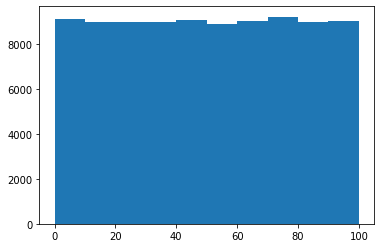

In [103]:
plt.hist(train_data.target)

### Pearson correlation heatmap

(54.0, 0.0)

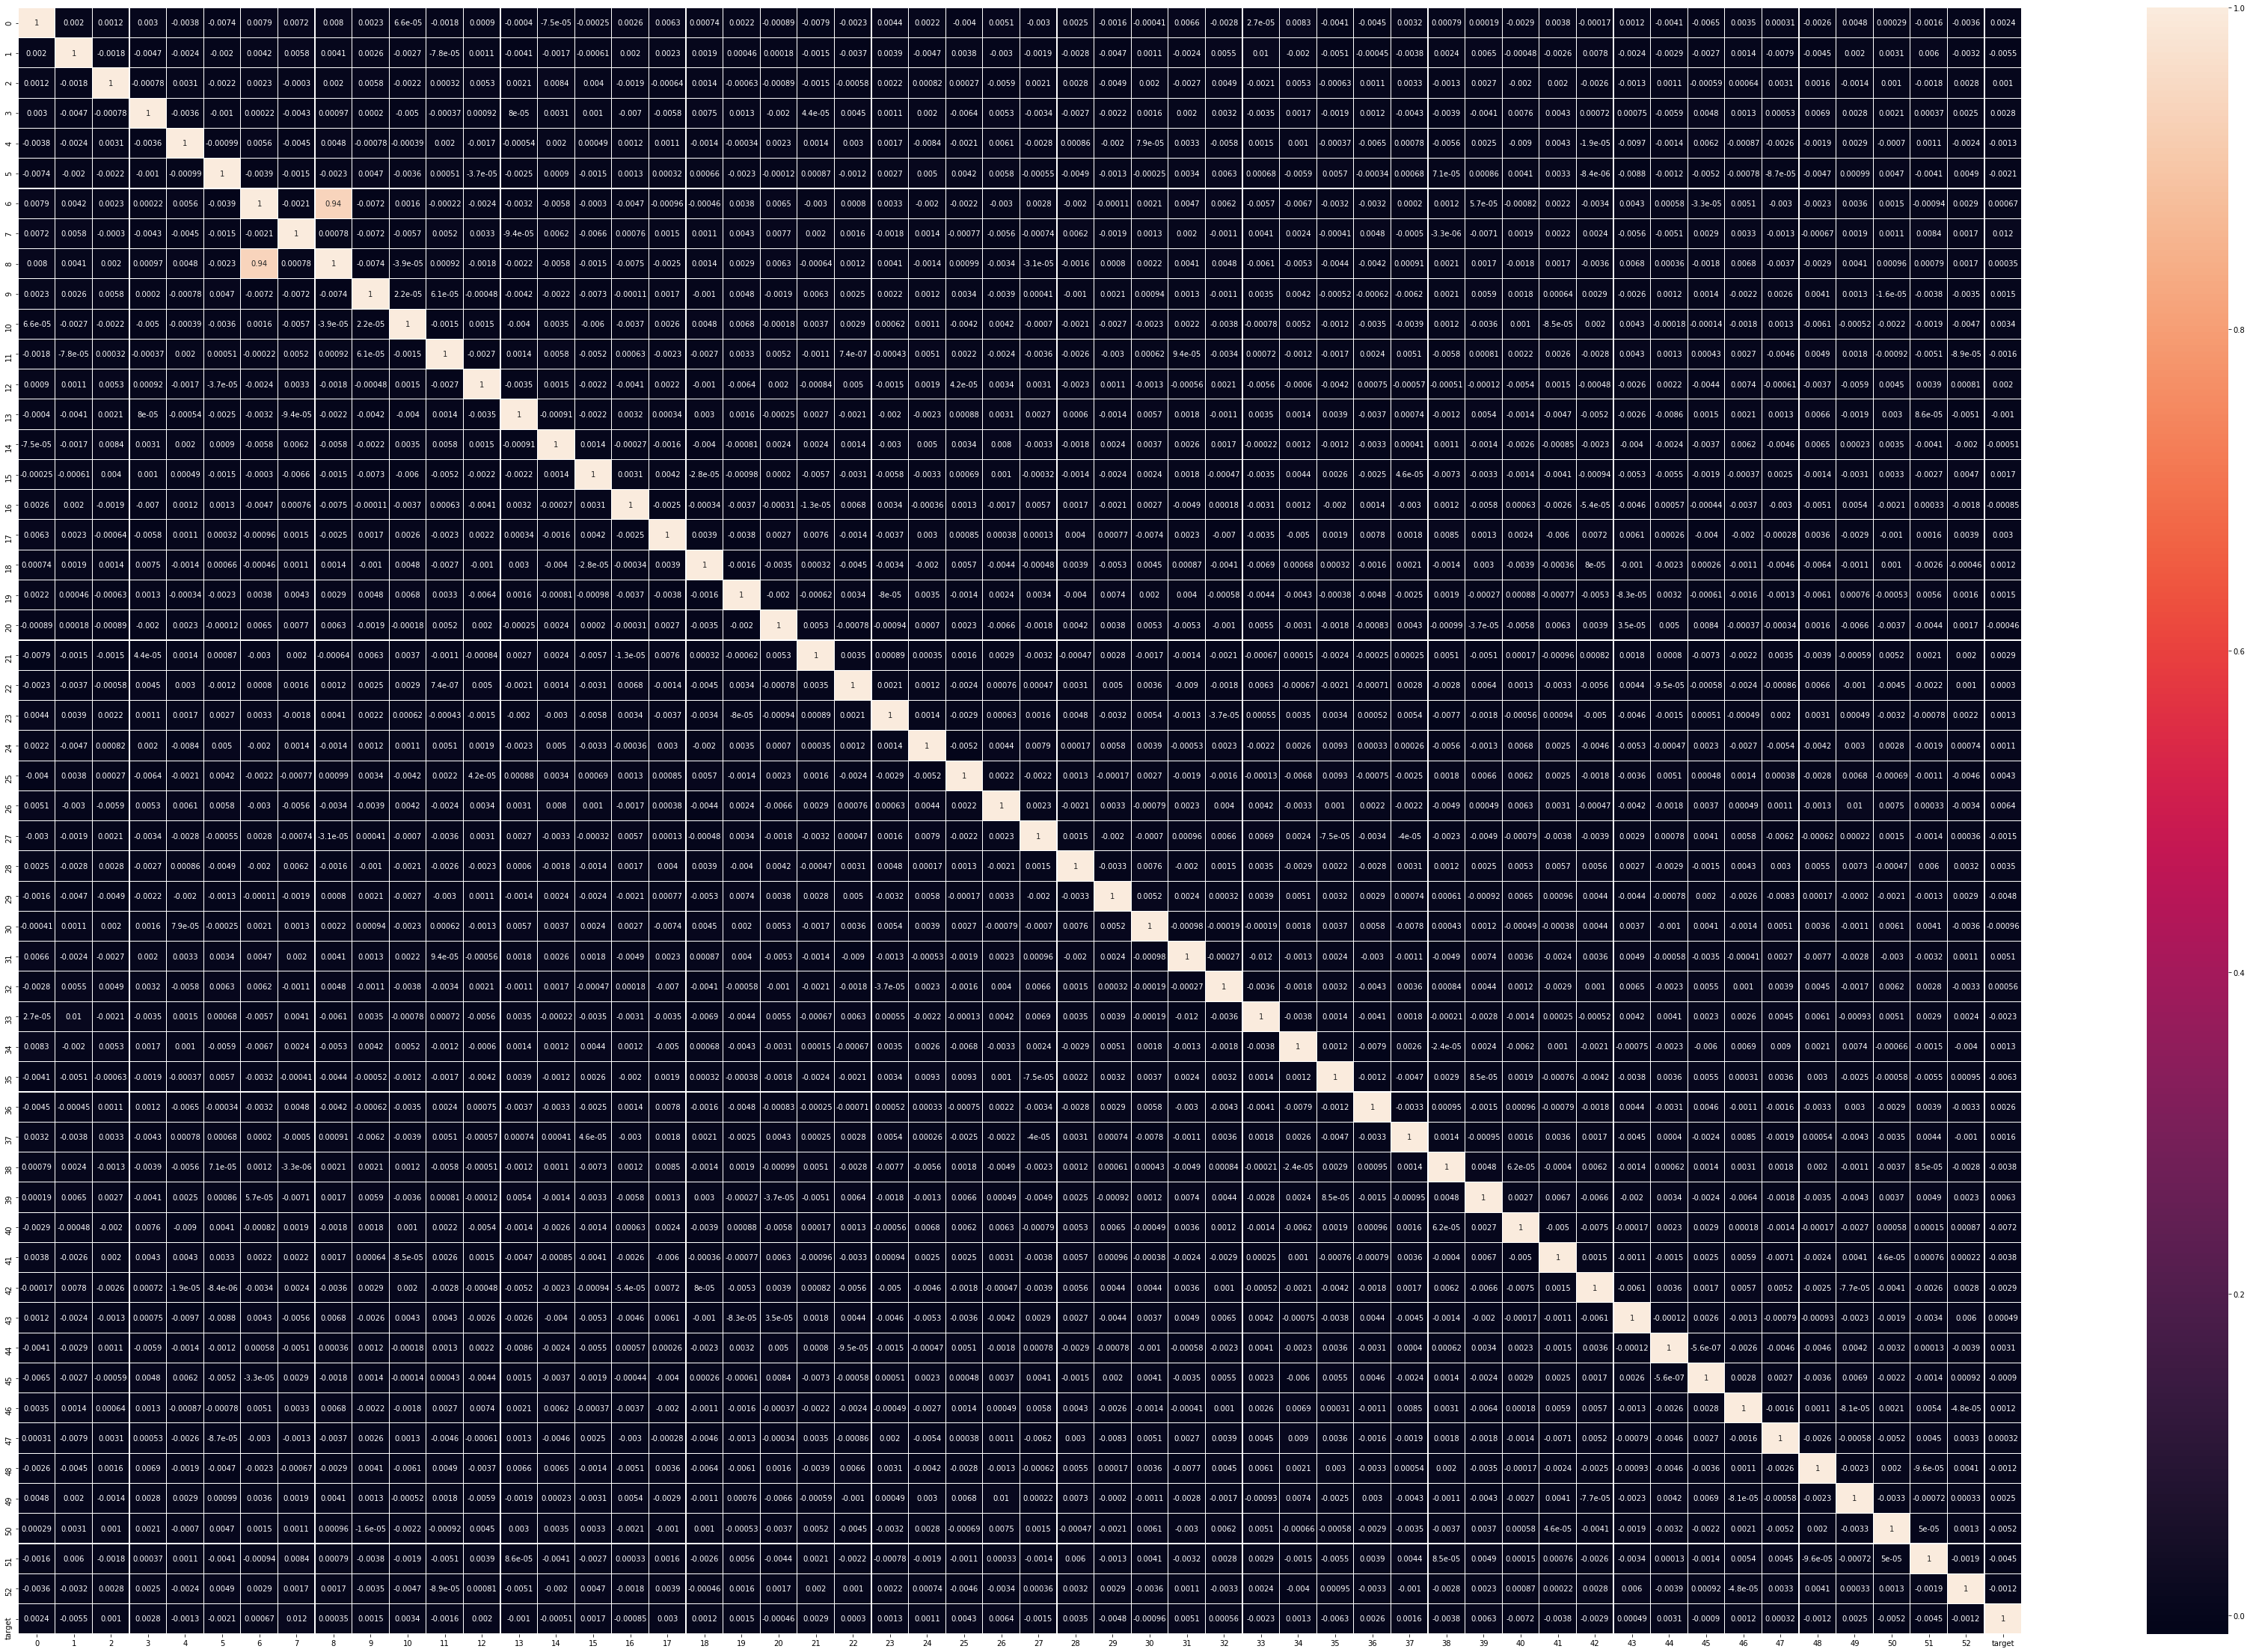

In [104]:
corr_map_data = train_data.corr()

fig, ax = plt.subplots(figsize=(60, 40))
bottom, top = ax.get_ylim()

corr_heatmap_sb = sb.heatmap(corr_map_data, annot=True, linewidths=0.1, ax=ax)
bottom, top = corr_heatmap_sb.get_ylim()
corr_heatmap_sb.set_ylim(bottom + 0.5, top - 0.5)


#### View hists of the correlated features

(array([16312., 12529.,  9017.,  5404.,  1376.,  2234.,  5473.,  8848.,
        12577., 16230.]),
 array([-9.94987437, -7.9598995 , -5.96992462, -3.97994975, -1.98997487,
         0.        ,  1.98997487,  3.97994975,  5.96992462,  7.9598995 ,
         9.94987437]),
 <a list of 10 Patch objects>)

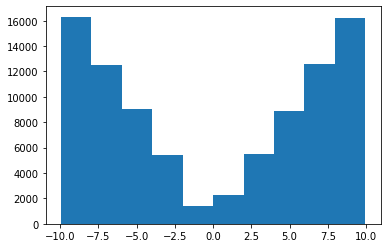

In [105]:
plt.hist(train_data['6'])

(array([45073.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44927.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

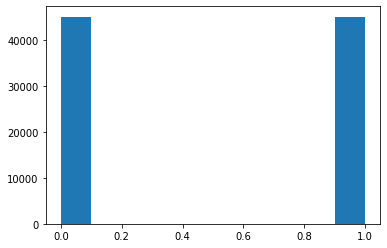

In [106]:
plt.hist(train_data['8'])

### View mutual information score

In [107]:
def get_mutual_info(dataset, target_name):
    dataset = dataset.copy()
    feature_cols = list(dataset.columns)

    dataset_filtered = dataset[feature_cols]
    dataset_filtered = dataset_filtered.dropna(axis=0)

    selector_mutual_info = SelectKBest(mutual_info_regression, k='all')

    selector_mutual_info.fit_transform(dataset_filtered[feature_cols].drop(target_name, axis=1), dataset_filtered[target_name])
    
    return selector_mutual_info.scores_, feature_cols

smi_score, feature_cols = get_mutual_info(train_data, 'target')

values_to_features = pd.DataFrame([smi_score])

In [108]:
values_to_features.transpose().rename(columns = {0: 'mi-score'}).sort_values(by='mi-score', ascending=False)

,mi-score
6,4.602137
7,1.274221
12,0.007240
29,0.005362
22,0.004537
2,0.004423
23,0.004287
28,0.003347
33,0.003322
1,0.002329


#### Display scatter plots for important feautes and target value

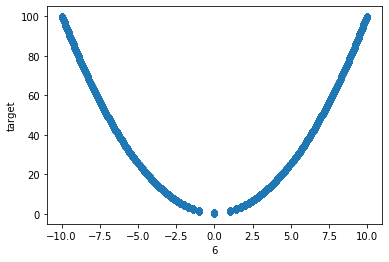

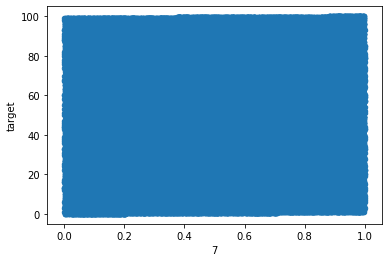

In [109]:
for i in range(6, 8):
    train_data.plot.scatter(x=str(i), y='target')
    plt.show()

## Modeling

In [110]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [111]:
dataset = train_data.copy()
target_column = 'target'
y = dataset[target_column]
X = dataset.drop([target_column], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

### Math analytical approach

Obvious values

In [112]:
preds_formula = val_X['6']**2
rmse(val_y, preds_formula)

0.5749466688607598

Wrong!!!

##### Deeper dive

`y = b*x^2 + a` a - equals to `train_y.min()`

`b = (y-a)/x^2`

In [113]:
a = train_y.min()

In [114]:
b = (train_y.max() - a) / train_X['6'].min()**2

In [115]:
a, b

(0.0026344631406050034, 1.010069169861431)

In [116]:
preds_formula = b*(val_X['6']**2)+a

In [117]:
rmse(val_y, preds_formula)

0.4098978232664593

### Random forest

In [118]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(train_X, train_y)
preds_rf = rf_model.predict(val_X)
rf_metric = rmse(val_y, preds_rf)
rf_metric

0.005511397063393804

#### Find the most important features

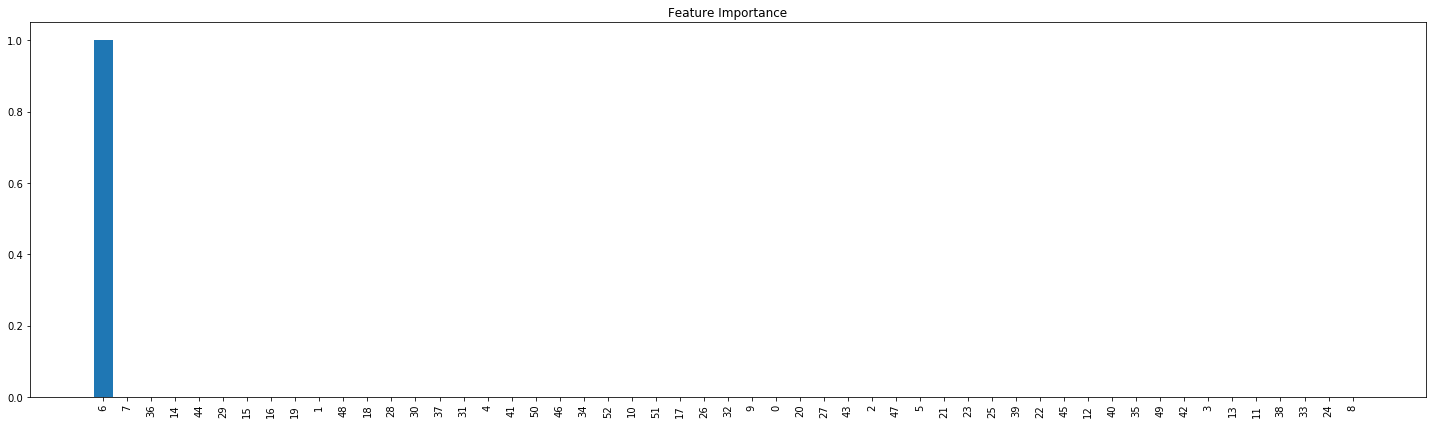

In [119]:
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20,6))
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### Save prediction

In [130]:
final_result = pd.concat([
    test_data,
    pd.DataFrame(rf_model.predict(test_data), columns=['target'])
], axis=1)

In [131]:
final_result.to_csv('file_with_model_predictions.csv')
